# CHD Prediction
## steps
- preprocessing 
- EDA
- trying all the models with there Confusion matrix 
- Conclusion


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('framingham.csv',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### checking for null values in the dataset


In [3]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## handing Nan or missing values 
there are different method
- remove dataframe(disadvange - we lose the row which decreses the result of the model).
- one of the best way is to use mean,median,mode and fill .

In [15]:
df['age'].mean()
df.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.691274,132.354599,82.897759,25.797212,75.878774,81.875472,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327586,22.033300,11.910394,4.071038,12.023937,22.833439,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df['age'].median()

49.0

In [66]:
import math 

df['education'] = df['education'].fillna(math.floor(df['education'].median()))
df['cigsPerDay'] = df['cigsPerDay'].fillna(math.floor(df['cigsPerDay'].median()))
df['BPMeds'] = df['BPMeds'].fillna(math.floor(df['BPMeds'].median()))
df['totChol'] = df['totChol'].fillna(math.floor(df['totChol'].median()))
df['BMI'] = df['BMI'].fillna(math.floor(df['BMI'].median()))
df['heartRate'] = df['heartRate'].fillna(math.floor(df['heartRate'].median()))
df['glucose'] = df['glucose'].fillna(math.floor(df['glucose'].median()))
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:>

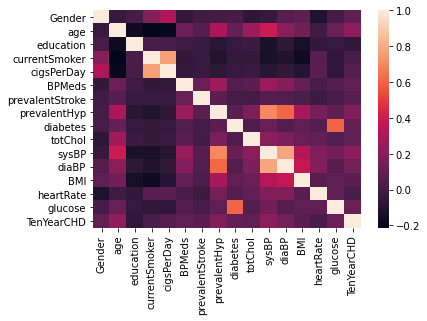

In [10]:
sns.heatmap(df.corr())

## EDA 

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

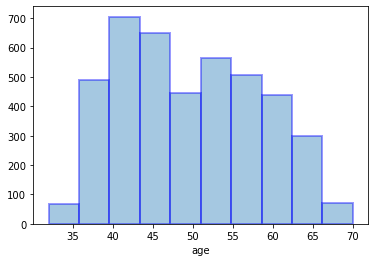

In [67]:
sns.distplot(df['age'], bins = 10,kde = False,hist = True,hist_kws = dict(edgecolor='b',linewidth = 2))

<AxesSubplot:title={'center':'age'}, xlabel='Gender', ylabel='age'>

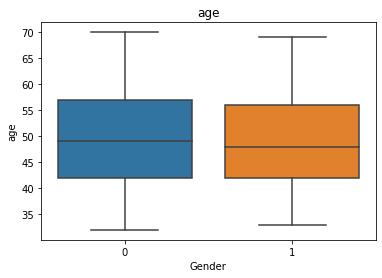

In [25]:
plt.title("age")
sns.boxplot(y = "age",data = df,x = "Gender")

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

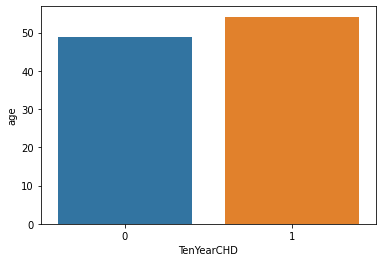

In [27]:
sns.barplot(x = 'TenYearCHD',y = 'age',data = df,ci = None)

<AxesSubplot:title={'center':'age'}, xlabel='TenYearCHD', ylabel='heartRate'>

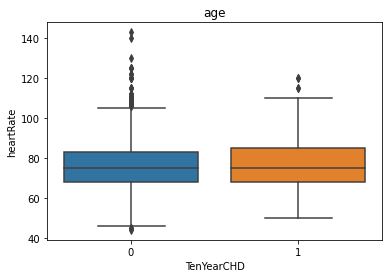

In [34]:
plt.title(
    "heartRate")
sns.boxplot(y = "heartRate",data = df,x = "TenYearCHD")

In [35]:
df['heartRate'].mean()

75.87877358490566

<AxesSubplot:xlabel='TenYearCHD', ylabel='heartRate'>

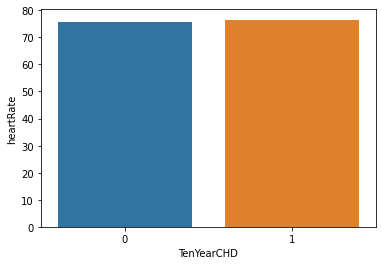

In [36]:
sns.barplot(x = 'TenYearCHD',y = 'heartRate',data = df,ci = None)

<AxesSubplot:xlabel='TenYearCHD', ylabel='currentSmoker'>

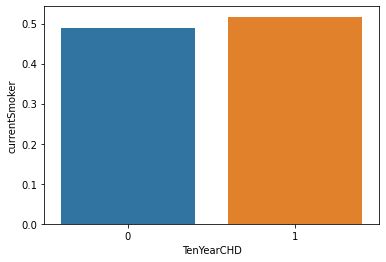

In [29]:
sns.barplot(x = 'TenYearCHD',y = 'currentSmoker',data = df,ci = None)

<AxesSubplot:xlabel='TenYearCHD', ylabel='cigsPerDay'>

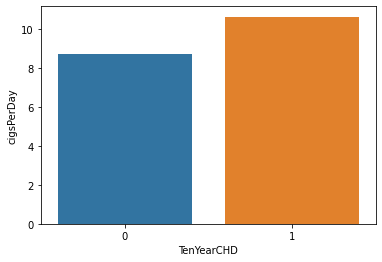

In [38]:
sns.barplot(x = 'TenYearCHD',y = 'cigsPerDay',data = df,ci = None)

<AxesSubplot:xlabel='age', ylabel='count'>

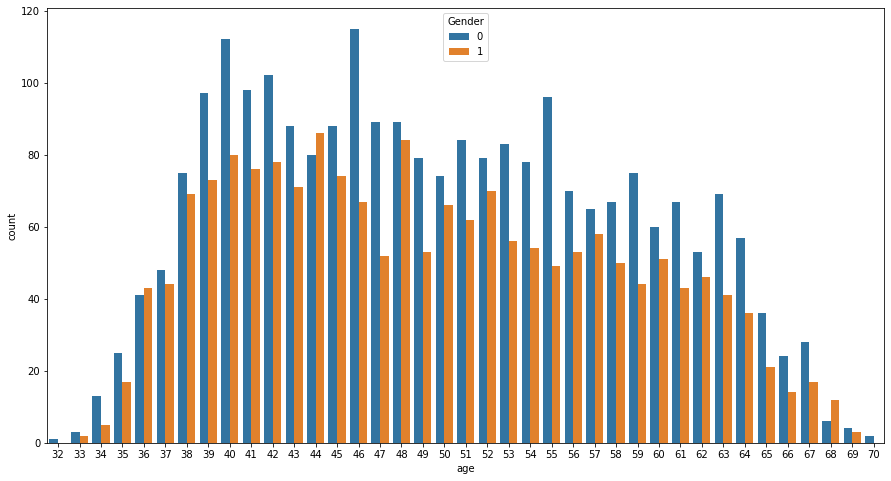

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(x = "age",data = df,hue = "Gender")

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

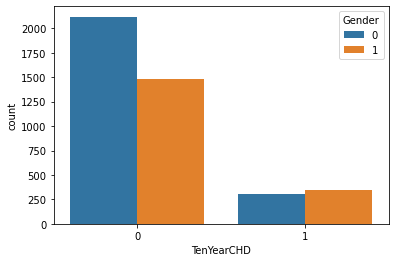

In [44]:
sns.countplot(x = "TenYearCHD",data = df,hue = "Gender")

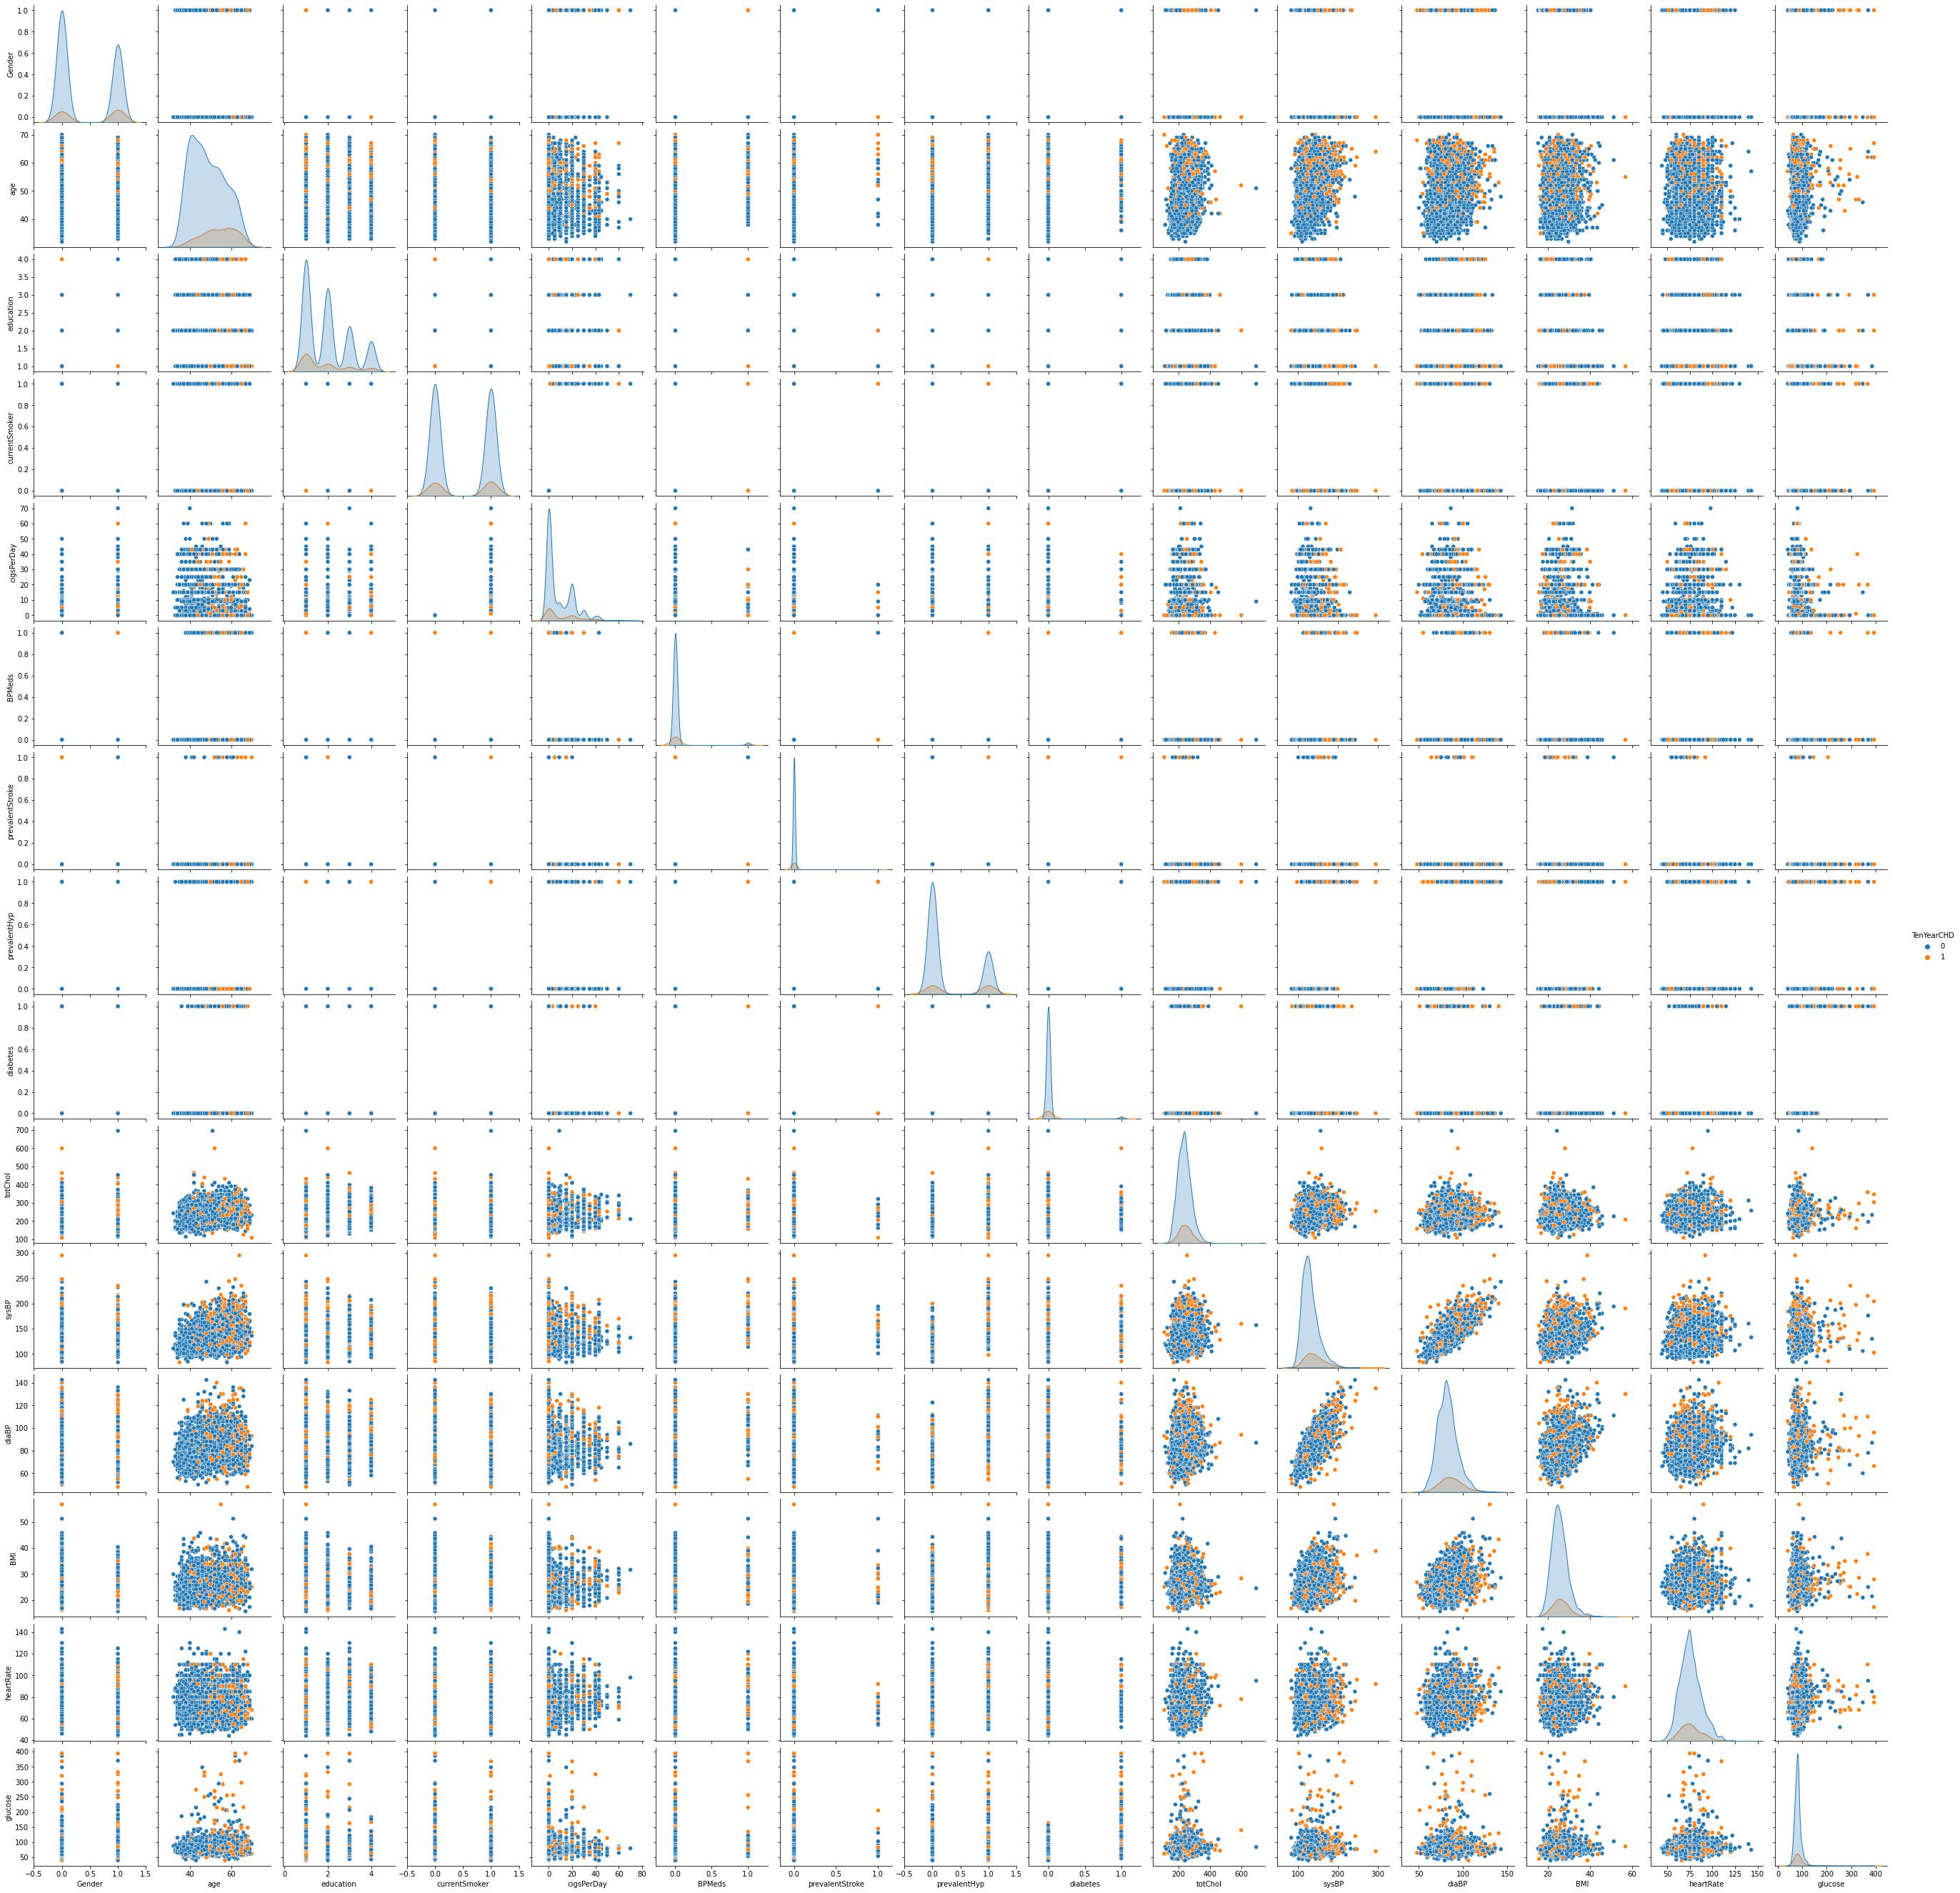

In [45]:
sns.pairplot(df,hue = "TenYearCHD")

<AxesSubplot:xlabel='BMI', ylabel='heartRate'>

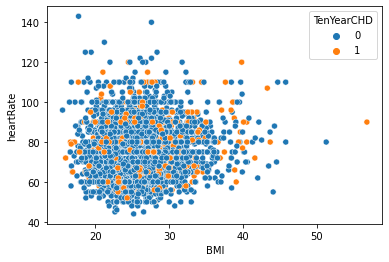

In [49]:
sns.scatterplot(x="BMI",y="heartRate",data = df,hue="TenYearCHD")

## train_test_spliting 
- 60% for training and 40% for test

In [398]:
from sklearn.model_selection import train_test_split
# indenpedent value
x = df[['sysBP','diaBP','BMI','currentSmoker','cigsPerDay','prevalentHyp','diabetes','prevalentStroke']]
# dependent 
y = df['TenYearCHD']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state = 30)

# appling the model
- Linear Regression
- LogisticRegession
- KNeighborsRegressor
- Support vector machine
- KMeans
- DecisionTreeClassifier
- RandomForestClassifier

In [53]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


In [399]:
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [400]:
pd.DataFrame(model_LR.coef_, x.columns, columns = ['Coeff'])

,Coeff
sysBP,0.004150
diaBP,-0.002427
BMI,-0.001348
currentSmoker,-0.016625
cigsPerDay,0.002558
prevalentHyp,0.049903
diabetes,0.160177
prevalentStroke,0.143453


<AxesSubplot:>

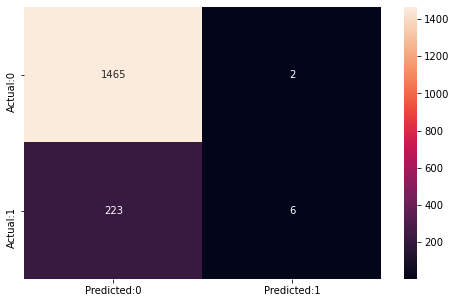

In [422]:
pred = model_LR.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred.round())
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [402]:
from sklearn.metrics import classification_report,confusion_matrix,consensus_score
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1467
           1       0.75      0.03      0.05       229

    accuracy                           0.87      1696
   macro avg       0.81      0.51      0.49      1696
weighted avg       0.85      0.87      0.81      1696



In [423]:
confusion_matrix(y_test,pred.round())

array([[1465,    2],
       [ 223,    6]], dtype=int64)

In [404]:
model_loR = LogisticRegression()
model_loR.fit(x_train,y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

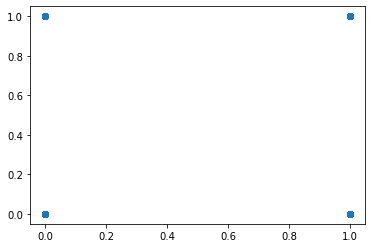

In [405]:
pred = model_loR.predict(x_test)
plt.scatter(y_test,pred)

In [406]:
confusion_matrix(y_test,pred)

array([[1461,    6],
       [ 219,   10]], dtype=int64)

In [407]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1467
           1       0.62      0.04      0.08       229

    accuracy                           0.87      1696
   macro avg       0.75      0.52      0.51      1696
weighted avg       0.84      0.87      0.81      1696



In [408]:
model_svm = svm.SVC()
model_svm.fit(x_train,y_train)
pred = model_svm.predict(x_test)

In [409]:
confusion_matrix(y_test,pred)

array([[1467,    0],
       [ 229,    0]], dtype=int64)

In [410]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1467
           1       0.00      0.00      0.00       229

    accuracy                           0.86      1696
   macro avg       0.43      0.50      0.46      1696
weighted avg       0.75      0.86      0.80      1696



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [411]:
model_KMean = KMeans(n_clusters=2,random_state=0)
model_KMean.fit(x_train,y_train)

KMeans(n_clusters=2, random_state=0)

In [412]:
pred_KMean = model_KMean.predict(x_test)
print(classification_report(y_test,pred_KMean.round()))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1467
           1       0.21      0.43      0.28       229

    accuracy                           0.70      1696
   macro avg       0.55      0.59      0.54      1696
weighted avg       0.80      0.70      0.74      1696



In [413]:
confusion_matrix(y_test,pred_KMean)

array([[1086,  381],
       [ 130,   99]], dtype=int64)

In [414]:
model_Dtc = DecisionTreeClassifier()
model_Dtc.fit(x_train,y_train)
pred_Dtc = model_Dtc.predict(x_test)
print(classification_report(y_test,pred_Dtc.round()))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1467
           1       0.15      0.21      0.17       229

    accuracy                           0.74      1696
   macro avg       0.51      0.51      0.51      1696
weighted avg       0.77      0.74      0.75      1696



In [415]:
confusion_matrix(y_test,pred_Dtc)

array([[1203,  264],
       [ 182,   47]], dtype=int64)

In [416]:
model_rf = RandomForestClassifier(max_depth=2,random_state=True)
model_rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)
print(classification_report(y_test,pred_rf.round()))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1467
           1       0.00      0.00      0.00       229

    accuracy                           0.86      1696
   macro avg       0.43      0.50      0.46      1696
weighted avg       0.75      0.86      0.80      1696



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [426]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=model_loR.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[516 951]
 [ 37 192]] 
 with 708 correct predictions and 37 Type II errors( False Negatives) 

 Sensitivity:  0.8384279475982532 Specificity:  0.35173824130879344 



With 0.2 threshold the Confusion Matrix is  
 [[1140  327]
 [ 127  102]] 
 with 1242 correct predictions and 127 Type II errors( False Negatives) 

 Sensitivity:  0.44541484716157204 Specificity:  0.7770961145194274 



With 0.3 threshold the Confusion Matrix is  
 [[1362  105]
 [ 178   51]] 
 with 1413 correct predictions and 178 Type II errors( False Negatives) 

 Sensitivity:  0.22270742358078602 Specificity:  0.9284253578732107 



With 0.4 threshold the Confusion Matrix is  
 [[1431   36]
 [ 200   29]] 
 with 1460 correct predictions and 200 Type II errors( False Negatives) 

 Sensitivity:  0.12663755458515283 Specificity:  0.9754601226993865 





c:\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. 

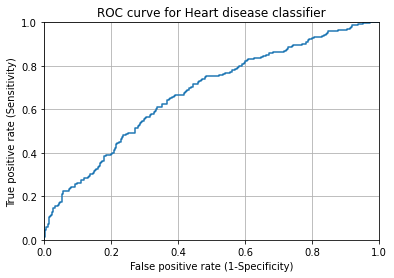

In [427]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Conclusion
- In the above all models maximum accuracy achevied was 87%(Logistic Regression)
- as from the various reference in the internet and from the data given to me the cholesterol , BMI , smoking and diabeties shows an effect in the coronary heart disease (CHD)